In [ ]:
import pandas as pd

churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

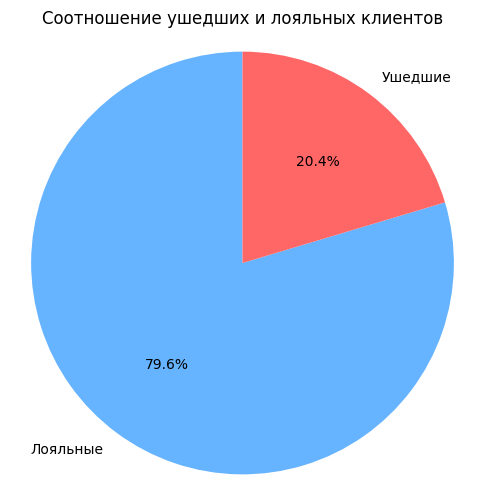

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
churn_data = pd.read_csv('data/churn.csv')

# Удалим лишний столбец
# RowNumber здесь просто нумерация строк (0, 1, 2, ...),
# и её можно получить напрямую из DataFrame.index.
churn_data = churn_data.drop(columns=['RowNumber'])

# Подсчёт количества ушедших и лояльных клиентов
churn_counts = churn_data['Exited'].value_counts()
labels = ['Лояльные', 'Ушедшие']
colors = ['#66b3ff', '#ff6666']

# Построение круговой диаграммы
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Соотношение ушедших и лояльных клиентов')
plt.axis('equal')
plt.show()

# Выводы к задаче 9.1.

Ушедших клиентов оказалось около 20%, это может говорить о достаточно хорошем уровне удержания.

## 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

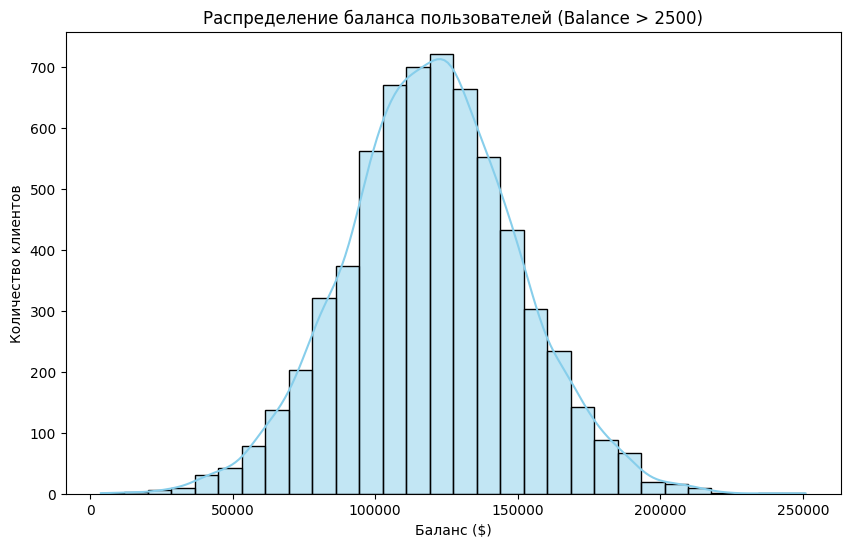

In [ ]:
import seaborn as sns

# Отбираем клиентов с балансом > 2500
filtered_data = churn_data[churn_data['Balance'] > 2500]

# Строим график распределения
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Balance'], bins=30, kde=True, color='skyblue')
plt.title('Распределение баланса пользователей (Balance > 2500)')
plt.xlabel('Баланс ($)')
plt.ylabel('Количество клиентов')
plt.show()


# Выводы к задаче 9.2.

Большая часть клиентов имеют баланс от 100 000 до 150 000 долларов

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

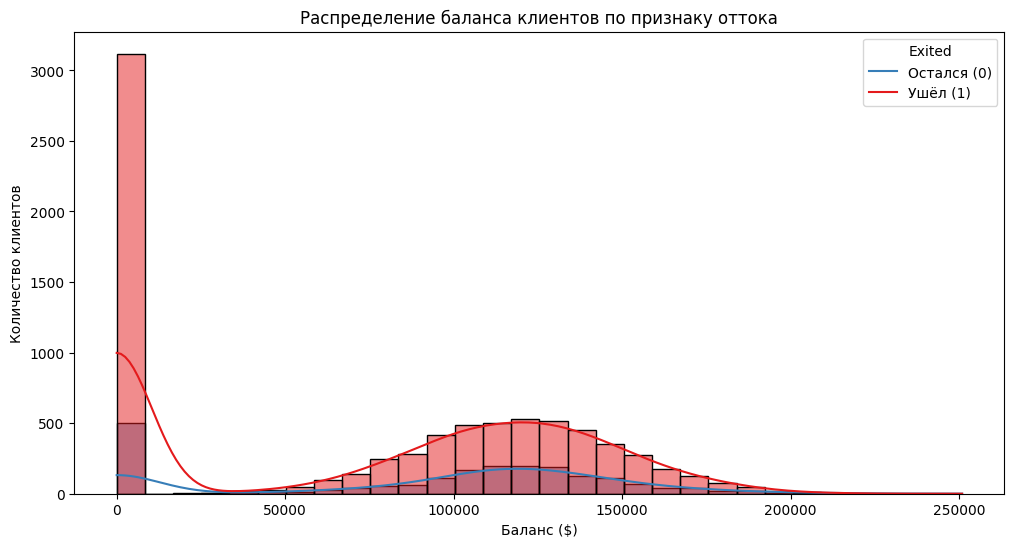

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(data=churn_data, x='Balance', hue='Exited', bins=30, kde=True, palette='Set1')
plt.title('Распределение баланса клиентов по признаку оттока')
plt.xlabel('Баланс ($)')
plt.ylabel('Количество клиентов')
plt.legend(title='Exited', labels=['Остался (0)', 'Ушёл (1)'])
plt.show()

# Выводы к задаче 9.3.

Что можно заметить:
- У лояльных клиентов (Exited = 0) есть две крупные группы: с нулевым балансом и в районе $120,000–$150,000.

- У ушедших клиентов (Exited = 1) больше сконцентрировано в сегменте высоких балансов — это видно по пику на графике в том же диапазоне $120,000+.

- При этом меньше клиентов с нулевым балансом ушло, по сравнению с теми, у кого был значительный остаток на счёте.

Выводы которые можно сделать:

- Клиенты с большим балансом чаще уходят. Это может говорить о:

     - недостатке персонализированных услуг;

     - недостаточном уровне сервиса;

     - высоких комиссиях или неудобных условиях;

     - недостаточно выгодных инвестиционных или накопительных предложениях.

- Клиенты с нулевым балансом чаще остаются — возможно, просто пользуются услугами банка (например, кредиткой или зарплатным проектом), но не держат сбережения в этом банке.

## 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

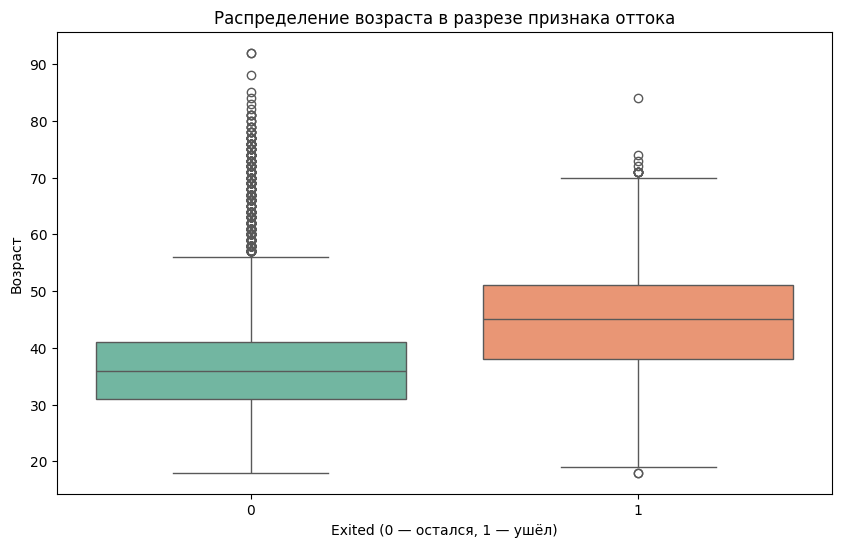

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=churn_data, x='Exited', y='Age', hue='Exited', palette='Set2')
plt.title('Распределение возраста в разрезе признака оттока')
plt.xlabel('Exited (0 — остался, 1 — ушёл)')
plt.ylabel('Возраст')
plt.legend([],[], frameon=False)  # скрыть легенду
plt.show()

# Выводы к задаче 9.4.

Что можно заметить:
- У лояльных клиентов (Exited = 0) возрастная группа более компактна, большинство (примерно от 32 до 40 лет).

- У ушедших клиентов (Exited = 1) возраст выше ( примерно от 40 до 53 лет 
  То есть клиенты старше 45 лет чаще уходят!!!

Выводы которые можно сделать:
- Больше выбросов — у группы Exited = 1, особенно среди возрастных клиентов.
- Банку стоит обратить внимание на клиентов в возрасте 45+:
     - Проводить опросы на тему качества сервиса.
     - Предлагать персональные условия.
     - Развивать направления пенсионных программ, инвестиций, удобств для   
       старшего поколения.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

# Выводы к задаче 9.5.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Подсказка
Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

# Выводы к задаче 9.6.

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

# Выводы к задаче 9.7.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

# Выводы к задаче 9.8.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

# Выводы к задаче 9.9.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [ ]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

# Выводы к задаче 9.10.